In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Wise ML/Boston.csv')
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [4]:
data.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**EXPLORATORY DATA ANALYSIS:**

In [5]:
def plot_scatter(df, cols):
    plt.figure(figsize=(20, 20))
    plt.suptitle('Independent vs Dependent Features')
    for loc, col in enumerate(cols):
        plt.subplot(4, 4, loc+1)
        plt.scatter(df[col], df['medv'])
        plt.xlabel(f'{col}')
        plt.ylabel('medv')
    return None

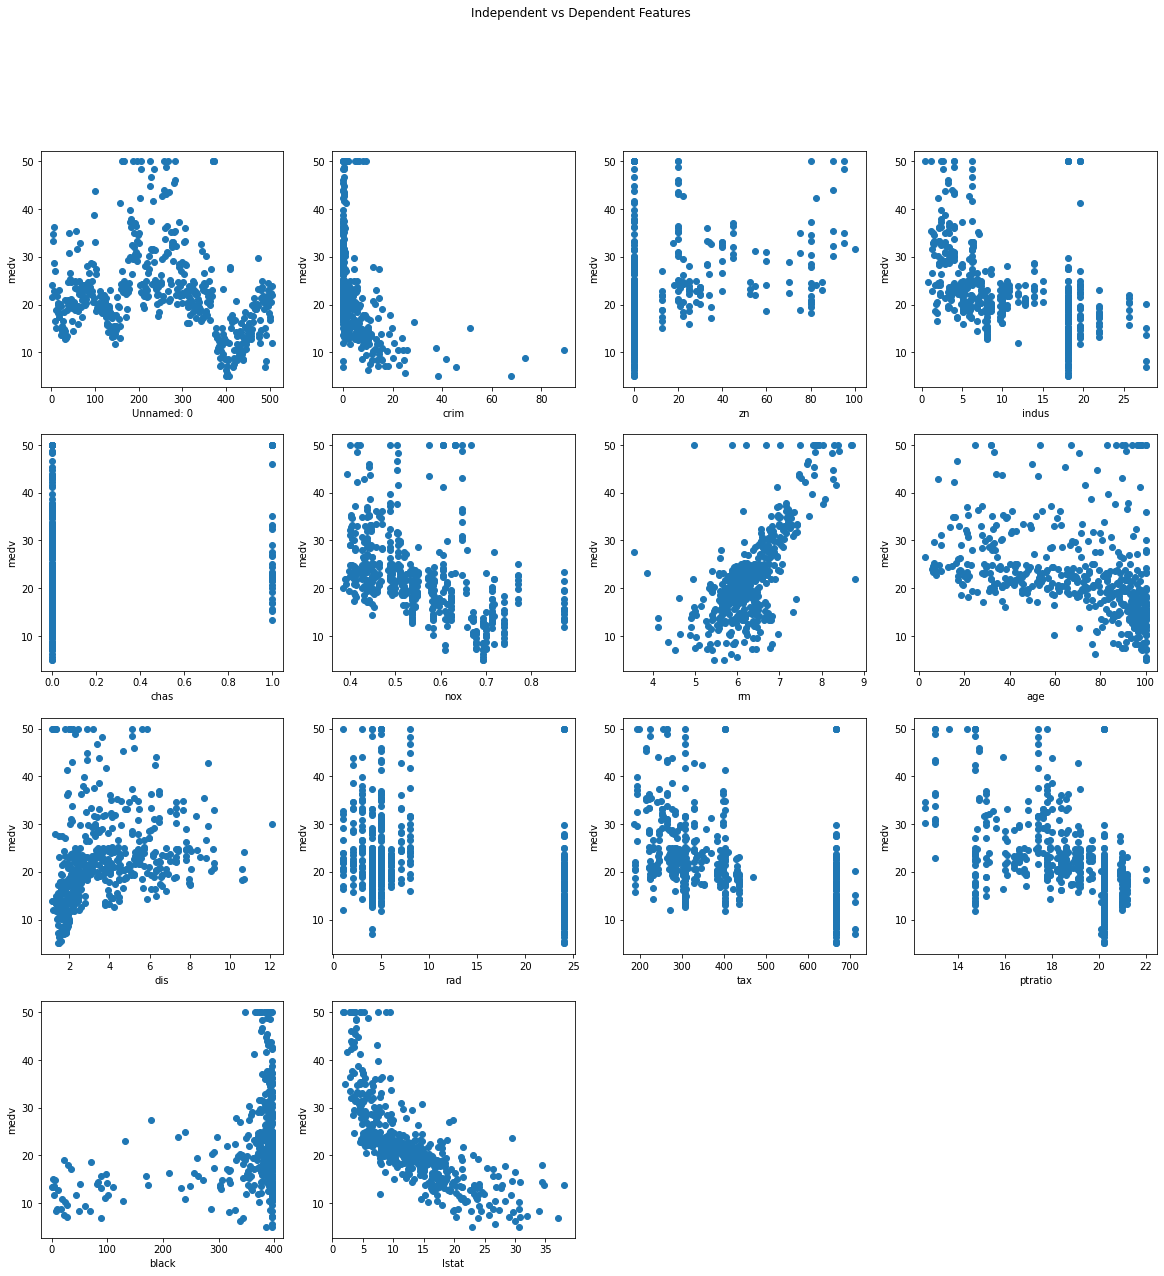

In [6]:
plot_scatter(data, data.columns[:-1])
plt.show()
plt.close()

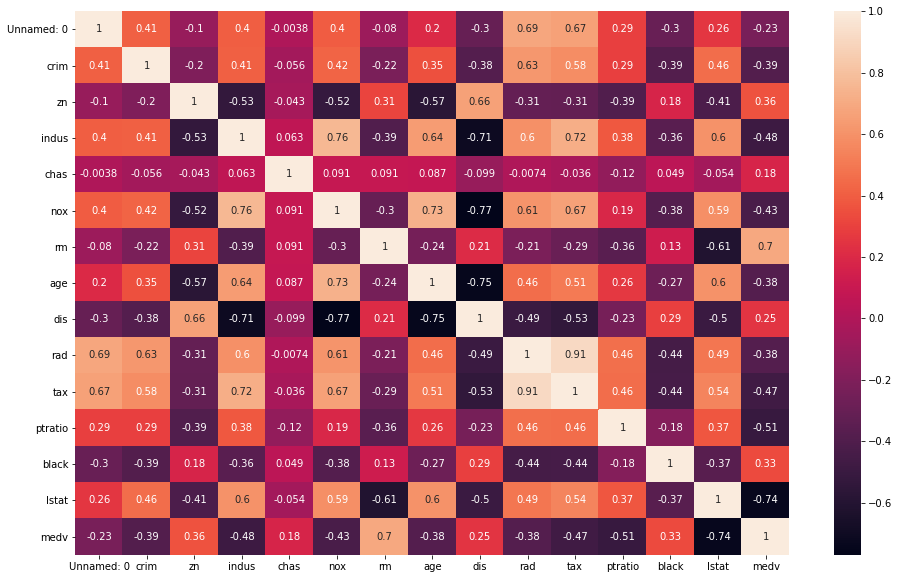

In [7]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

**SPLITTING DATASET:**

In [8]:
features = data.drop(['medv'], axis=1)
target = data['medv']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
print(X_train.shape)

(354, 14)


**MODEL TRAINING:**

In [9]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print(lr_model.intercept_, lr_model.coef_)

31.781523563218997 [-4.73768402e-03 -1.34324544e-01  4.03521812e-02  5.42712741e-02
  3.08236166e+00 -1.50470667e+01  4.10895363e+00 -1.58851874e-02
 -1.42311798e+00  2.81667805e-01 -7.67725309e-03 -9.01737976e-01
  1.18778477e-02 -5.53043042e-01]


In [10]:
train_pred = lr_model.predict(X_train)
test_pred = lr_model.predict(X_test)

print(f"Training error: {sqrt(mean_squared_error(y_train, train_pred)):.3f}")
print(f"Testing error: {sqrt(mean_squared_error(y_test, test_pred)):.3f}")

Training error: 4.726
Testing error: 4.687


In [11]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
441    17.1
23     14.5
225    50.0
433    14.3
447    12.6
Name: medv, Length: 152, dtype: float64

In [12]:
test_pred

array([28.61693942, 36.30028466, 14.31747783, 26.13015646, 18.70581899,
       23.68237448, 16.58103592, 14.36386779, 22.7332411 , 19.20858225,
       24.4446439 , 19.13298699, -7.12592238, 22.39404487, 18.42961061,
       26.09090302, 20.28586961,  5.5908678 , 40.7897148 , 17.40193287,
       27.18239724, 29.96110704, 11.39733239, 22.44295669, 18.0639387 ,
       15.55736931, 23.82078096, 14.36349234, 21.91394005, 17.96983389,
       22.04084013, 24.59565913, 25.58555609, 18.79344782, 16.29084585,
       17.74089966, 31.66546188, 19.41626474, 23.66656996, 25.59616199,
       12.51566039, 31.3847964 , 42.9440455 , 18.17964226, 27.31307527,
       17.2894997 , 14.28493643, 26.85656515, 20.04672805, 30.86519764,
       21.95797082, 33.77491134, 16.16898485, 26.65939373, 39.12330782,
       22.8226728 , 18.83790583, 32.98235227, 25.20814878, 12.53346677,
       23.42327431, 31.78485242, 31.80839407, 17.16507905, 20.48956949,
       16.05460922, 20.47257935, 26.77739296, 32.11914138, 11.77

In [13]:
lr_model.score(X_test, y_test)

0.7051609808903443

In [14]:
lr_model.score(X_train, y_train)

0.7459101679237474